In [1]:
import torch
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
proportion = torch.load("../partImageNet_proportion.pt")

In [3]:
proportion_statistics = pd.DataFrame(
    {
        "proportion":[i[0] for i in list(proportion.values())],
        "key": list(proportion.keys())
    }
)

In [4]:
result_bn = torch.load("result_bn.pt")
result_vit = torch.load("../result_vit_48.pt")

result_ds = torch.load("ds_result.pt")

In [5]:
def get_region_accuracy_bn(proportion, statistics, record, region):
    certification_result = torch.tensor(record["certification_result"])
    lower = statistics["proportion"].quantile(region[0])
    upper = statistics["proportion"].quantile(region[1])
    proportion_list = torch.tensor([proportion[i][0] for i in record["file_list"]])
    index = torch.bitwise_and(lower <= proportion_list, proportion_list <= upper)
    robust = certification_result[index]
    return float(torch.sum(robust == 2) / len(robust))

In [6]:
def get_region_accuracy_ds(proportion, statistics, record, region):
    certification_result = torch.tensor(record["cert_correct_list"])
    lower = statistics["proportion"].quantile(region[0])
    upper = statistics["proportion"].quantile(region[1])
    proportion_list = torch.tensor([proportion[i][0] for i in record["file_list"]])
    index = torch.bitwise_and(lower <= proportion_list, proportion_list <= upper)
    robust = certification_result[index]
    return float(torch.sum(robust == 1) / len(robust))

In [7]:
def get_region_accuracy_vit(proportion, statistics, record, region):
    certification_result = torch.tensor(record["verified_correct_list"])
    lower = statistics["proportion"].quantile(region[0])
    upper = statistics["proportion"].quantile(region[1])
    proportion_list = torch.tensor([proportion[i[0]][0] for i in record["file_list"]])
    index = torch.bitwise_and(lower <= proportion_list, proportion_list <= upper)
    robust = certification_result[index]
    return float(torch.sum(robust == 1) / len(robust))

In [8]:
get_region_accuracy_bn(proportion, proportion_statistics, result_bn, (0.8, 0.9))

0.45945945382118225

In [9]:
get_region_accuracy_ds(proportion, proportion_statistics, result_ds, (0, 0.1))

0.0878378376364708

In [10]:
get_region_accuracy_vit(proportion, proportion_statistics, result_vit, (0, 0.1))

0.5405405163764954

In [11]:
x = list()
bn = list()
ds = list()
vit = list()
for i in range(5):
    region = (i*0.2, (i+1)*0.2)
    x.append(region[1])
    bn.append(get_region_accuracy_bn(proportion, proportion_statistics, result_bn, region))
    ds.append(get_region_accuracy_ds(proportion, proportion_statistics, result_ds, region))
    vit.append(get_region_accuracy_vit(proportion, proportion_statistics, result_vit, region))

In [12]:
ds

[0.10304053872823715,
 0.2165820598602295,
 0.240270733833313,
 0.1912013590335846,
 0.19594594836235046]

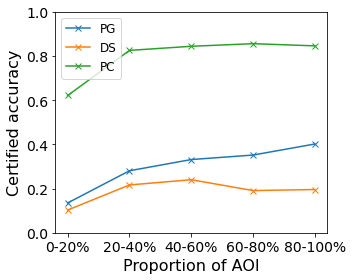

In [31]:
plt.figure(figsize=(5, 4))
plt.plot(x, bn, marker="x", label="PG")
plt.plot(x, ds, marker="x", label="DS")
plt.plot(x, vit, marker="x", label="PC")
plt.xticks(x, ["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])
plt.ylabel("Certified accuracy", fontsize=16)
plt.xlabel("Proportion of AOI", fontsize=16)
plt.ylim(0, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.savefig("partimageNet.pdf", dpi=300)

In [32]:
import torchvision

In [35]:
dataset = torchvision.datasets.VOCDetection(root="/MALEI/voc_detection", download=True, image_set="val")

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting /MALEI/voc_detection/VOCtrainval_11-May-2012.tar to /MALEI/voc_detection


In [37]:
for i in dataset:
    print(i)
    break

(<PIL.Image.Image image mode=RGB size=500x375 at 0x7F8D869B08B0>, {'annotation': {'folder': 'VOC2012', 'filename': '2008_000002.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '375', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'tvmonitor', 'pose': 'Frontal', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '34', 'ymin': '11', 'xmax': '448', 'ymax': '293'}, 'difficult': '0'}]}})


In [43]:
from torchvision.datasets import CIFAR10, CIFAR100, ImageFolder, MNIST, ImageNet

In [108]:
dataset = ImageFolder(
                "/MALEI/imagenet2012/validation",
            )

In [113]:
help(torchvision.datasets.ImageFolder)

Help on class ImageFolder in module torchvision.datasets.folder:

class ImageFolder(DatasetFolder)
 |  ImageFolder(root: str, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, loader: Callable[[str], Any] = <function default_loader at 0x7f8d88d43c10>, is_valid_file: Optional[Callable[[str], bool]] = None)
 |  
 |  A generic data loader where the images are arranged in this way by default: ::
 |  
 |      root/dog/xxx.png
 |      root/dog/xxy.png
 |      root/dog/[...]/xxz.png
 |  
 |      root/cat/123.png
 |      root/cat/nsdf3.png
 |      root/cat/[...]/asd932_.png
 |  
 |  This class inherits from :class:`~torchvision.datasets.DatasetFolder` so
 |  the same methods can be overridden to customize the dataset.
 |  
 |  Args:
 |      root (string): Root directory path.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transf

In [109]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=500x375 at 0x7F8D6AB34BE0>, 0)

In [105]:
list(range(0, 50000, 10))

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000,
 1010,
 1020,
 1030,
 1040,
 1050,
 1060,
 1070,
 1080,
 1090,
 1100,
 1110,
 1120,
 1130,
 1140,
 1150,
 1160,
 1170,
 1180,
 1190,
 1200,
 1210,
 1220,
 1230,
 1240,
 1250,
 1260,
 1270,
 1280,
 1290,
 1300,
 1310,
 1320,
 1330,
 1340,
 1350,
 1360,
 1370,
 1380,
 1390,
 1400,
 1410,
 1420,
 1430,
 1440,
 1450,
 1460,
 1470,
 1480,
 1490,
 1500,
 1510,
 1520,
 1530,
 1540,
 1550,
 1560,
 1570,
 1580

In [101]:
dataset.samples[4]

('/MALEI/imagenet2012/validation/n01440764/ILSVRC2012_val_00007197.JPEG', 0)

In [84]:
temp = [i[0].split("/")[-1] for i in dataset.samples]

In [99]:
dataset.imgs[0]

('/MALEI/imagenet2012/validation/n01440764/ILSVRC2012_val_00000293.JPEG', 0)

In [41]:
ImageFolder(
                root=os.path.join(data_dir, split),
                transform=transform,
                is_valid_file=is_valid_file
            )

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000002.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '375', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'tvmonitor',
    'pose': 'Frontal',
    'truncated': '0',
    'occluded': '0',
    'bndbox': {'xmin': '34', 'ymin': '11', 'xmax': '448', 'ymax': '293'},
    'difficult': '0'}]}}

In [65]:
temp[0]

'ILSVRC2012_val_00000293.JPEG'

In [51]:
import pandas as pd

In [80]:
loc_val = pd.read_csv("/MALEI/bounding_box_ImageNet/LOC_val_solution.csv")

In [91]:
loc_id_set = set(loc_val["ImageId"])

In [97]:
loc_id_set

{'ILSVRC2012_val_00014246',
 'ILSVRC2012_val_00014500',
 'ILSVRC2012_val_00020012',
 'ILSVRC2012_val_00026812',
 'ILSVRC2012_val_00035542',
 'ILSVRC2012_val_00006617',
 'ILSVRC2012_val_00016621',
 'ILSVRC2012_val_00041931',
 'ILSVRC2012_val_00031082',
 'ILSVRC2012_val_00010924',
 'ILSVRC2012_val_00012899',
 'ILSVRC2012_val_00038310',
 'ILSVRC2012_val_00038103',
 'ILSVRC2012_val_00003921',
 'ILSVRC2012_val_00015645',
 'ILSVRC2012_val_00019616',
 'ILSVRC2012_val_00033798',
 'ILSVRC2012_val_00003471',
 'ILSVRC2012_val_00019979',
 'ILSVRC2012_val_00027639',
 'ILSVRC2012_val_00000386',
 'ILSVRC2012_val_00022308',
 'ILSVRC2012_val_00042510',
 'ILSVRC2012_val_00041329',
 'ILSVRC2012_val_00034101',
 'ILSVRC2012_val_00013208',
 'ILSVRC2012_val_00044710',
 'ILSVRC2012_val_00001039',
 'ILSVRC2012_val_00033926',
 'ILSVRC2012_val_00033529',
 'ILSVRC2012_val_00017104',
 'ILSVRC2012_val_00044810',
 'ILSVRC2012_val_00008144',
 'ILSVRC2012_val_00046464',
 'ILSVRC2012_val_00007327',
 'ILSVRC2012_val_000